In [89]:
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor, DMatrix
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error
import pickle
from xgboost import plot_importance
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

In [2]:
params = {'legend.fontsize': 14,
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize': 10,
         'ytick.labelsize': 10}
plt.rcParams.update(params)

In [16]:
## Create file paths to use. Change to the 'Datasets directory'
gold_col = 'GOLDAMGBDollarD228NLBM' # 'GOLD_shift' 
initial_dir = os.getcwd()
data_path = os.path.join(os.getcwd(), "data")

In [4]:
# Import the datasets we exported from the data prep notebook. Drop the 'dateRep' column.
train_X = pd.read_csv(os.path.join(data_path, "train", 'train_x_high.csv'), index_col=0)
train_y = pd.read_csv(os.path.join(data_path, "train", 'train_y_high.csv'), index_col=0)

df_x = pd.read_csv(os.path.join(data_path, "test", 'test_x_high.csv'), index_col=0)
df_y = pd.read_csv(os.path.join(data_path, "test", 'test_y_high.csv'), index_col=0)

In [5]:
params = {'max_depth':[5, 10, 15],
          'eta': [0.1, 0.2, 0.3, 0.5],
          'n_estimators': [50, 100, 200],
          'min_child_weight':[1, 2, 3, 5],
          'gamma': [1, 2, 3, 5]}

In [6]:
xgbr = XGBRegressor(objective="reg:squarederror",
                    eval_metric='mae',
                    num_round=30,
                    silent = 0)

In [47]:
model = GridSearchCV(estimator=xgbr,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=10,
                     verbose=1,
                     n_jobs=-1)

In [48]:
# Train the model. Can take > 2 minutes.
# Remove quote marks if you want to run the model.
model.fit(train_X.values, train_y.values)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 1444 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 2344 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 3444 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4744 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  1.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, eval_metric='mae',
                                    gamma=0, importance_type='gain',
                                    learning_rate=0.1, max_delta_step=0,
                                    max_depth=3, min_child_weight=1,
                                    missing=None, n_estimators=100, n_jobs=1,
                                    nthread=None, num_round=30,
                                    objective='reg:squared...
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=0,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.1, 0.2, 0.3, 0.5], 'gamma': [1

In [81]:
model.get_params(deep=True)

{'cv': 10,
 'error_score': nan,
 'estimator__base_score': 0.5,
 'estimator__booster': 'gbtree',
 'estimator__colsample_bylevel': 1,
 'estimator__colsample_bynode': 1,
 'estimator__colsample_bytree': 1,
 'estimator__gamma': 0,
 'estimator__importance_type': 'gain',
 'estimator__learning_rate': 0.1,
 'estimator__max_delta_step': 0,
 'estimator__max_depth': 3,
 'estimator__min_child_weight': 1,
 'estimator__missing': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': 1,
 'estimator__nthread': None,
 'estimator__objective': 'reg:squarederror',
 'estimator__random_state': 0,
 'estimator__reg_alpha': 0,
 'estimator__reg_lambda': 1,
 'estimator__scale_pos_weight': 1,
 'estimator__seed': None,
 'estimator__silent': 0,
 'estimator__subsample': 1,
 'estimator__verbosity': 1,
 'estimator__eval_metric': 'mae',
 'estimator__num_round': 30,
 'estimator': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='ma

In [116]:
params = {'cv': 10,
 'estimator__booster': 'gbtree',
 'estimator__gamma': 0,
 'estimator__importance_type': 'gain',
 'estimator__learning_rate': 0.1,
 'estimator__max_delta_step': 0,
 'estimator__max_depth': 3,
 'estimator__min_child_weight': 1,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': 1,
 'estimator__objective': 'reg:squarederror',
 'estimator__silent': 0,
 'estimator__subsample': 1,
 'estimator__verbosity': 1,
 'estimator__eval_metric': 'mae',
 'estimator__num_round': 30}

In [120]:
evallist = [(y, 'eval'), (X, 'train')]
X = xgb.DMatrix(train_X, label='train')
gold = XGBClassifier()
bst = xgb.train(params, X, evallist)

TypeError: must be real number, not str

In [113]:
X = train_X.values
y = train_y.values

In [115]:
gold.fit(X, y, params)

TypeError: must be real number, not str

[nan nan nan nan nan nan nan]


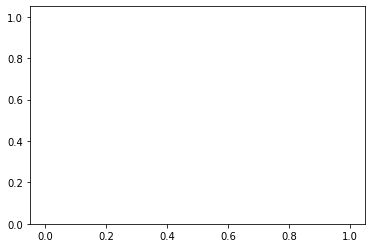

In [97]:
# feature importance
print(gold.feature_importances_)
# plot
pyplot.bar(range(len(gold.feature_importances_)), gold.feature_importances_)
pyplot.show()

In [10]:
model_path = os.path.join(os.getcwd(), "model")
# Check if the directory exists.
# Skip this cell if you didn't run the model.
if os.path.exists(model_path) is False:
    os.mkdir(model_path)
# Export the computed model for quick import again later.
pickle.dump(model, open(os.path.join(os.getcwd(), "model", "xgb.pkl"), "wb"))

In [11]:
"""model_path = os.path.join(data_folder, "model")
# This code is to import the ready made model, remove the '#' symbol on the line below to import it.
model = pickle.load(open(os.path.join(model_path, "xgb.pkl"), "rb"))"""

'model_path = os.path.join(data_folder, "model")\n# This code is to import the ready made model, remove the \'#\' symbol on the line below to import it.\nmodel = pickle.load(open(os.path.join(model_path, "xgb.pkl"), "rb"))'

In [98]:
# Concatenate together the test x and y dataframes
df = pd.concat([df_x, df_y], axis=1)
# Merge the train X and y dataframes
df1 = train_X.merge(train_y, left_index=True, right_index=True)
df1['gold_pred'] = gold.predict(train_X.values)

In [103]:
# Predicting the daily deaths for each country using our model
y_pred = gold.predict(df_x.values) # model.predict(df_x[train_X.columns].values)
df["gold_pred"] = y_pred
# Computing the model error
#df["model_error"] = df["GOLDAMGBDollarD228NLBM"] - df["gold_pred"]

ValueError: Length of values does not match length of index

In [100]:
# Append df and df1 so that we now have the complete dataframe again
df = df.append(df1)
# Compute the real - predicted error.
df["model_error"] = df["GOLDAMGBDollarD228NLBM"] - df["gold_pred"]
# Import in the covid19_df from the data prep stage for a full comparison to the predictions
df_global = pd.read_csv(os.path.join(os.getcwd(), "Data_Export", "gold_df_high.csv"), index_col=0)
# Merge the df_global dataframe with the predicted deaths and model error columns we created
df_global = df_global.merge(df[['gold_pred', 'model_error']], left_index=True, right_index=True)
df_global.index = pd.to_datetime(df_global.index)
# Calculate the cumulative error in the model for each country using a 'groupby'
df_global['cumulative_error'] = df_global['model_error'].cumsum()

In [101]:
## Calculate the mean absolute error and R2 scores for the predicted vs real test data.
print(f"Test data MAE score: {np.round(mean_absolute_error(df1.loc[df1.index < '2020-08-31'][gold_col], df1.loc[df1.index < '2020-08-31']['gold_pred']))}")
print(f"Test data R2 score: {np.round(r2_score(df1.loc[df1.index < '2020-08-31'][gold_col], df1.loc[df1.index < '2020-08-31']['gold_pred']))}")
## Calculate the mean absolute error and R2 scores for the predicted vs real all data.
print(f"All Data MAE score: {np.round(mean_absolute_error(df_global.loc[df_global.index < '2020-08-31'][gold_col], df_global.loc[df_global.index < '2020-08-31']['gold_pred']))}")
print(f"All Data R2 score: {np.round(r2_score(df_global.loc[df_global.index < '2020-08-31'][gold_col], df_global.loc[df_global.index < '2020-08-31']['gold_pred']))}")

Test data MAE score: 446.0
Test data R2 score: -1.0


KeyError: 'gold_pred'

KeyError: 'gold_pred'

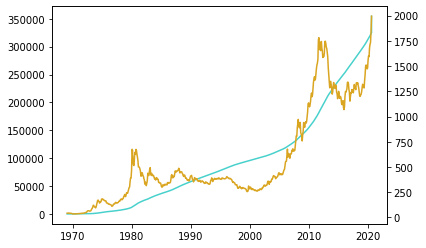

In [102]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'GOLDAMGBDollarD228NLBM'
k = 'cumulative_error'
l = 'gold_pred'

ax1.plot(df_global.index, df_global[k], label=k, c='mediumturquoise')


ax2 = ax1.twinx()
ax2.plot(df_global.index, df_global[j], label='gold (US $)', c='goldenrod')
ax2.plot(df_global.index, df_global[l], label='gold predicted (US $)', c='gold')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Date')
ax1.set_ylabel(j)
ax2.set_ylabel('Price (US $)')
#plt.savefig('cumulative_error_20_countries_XGB_dpi300.jpeg', dpi=300)

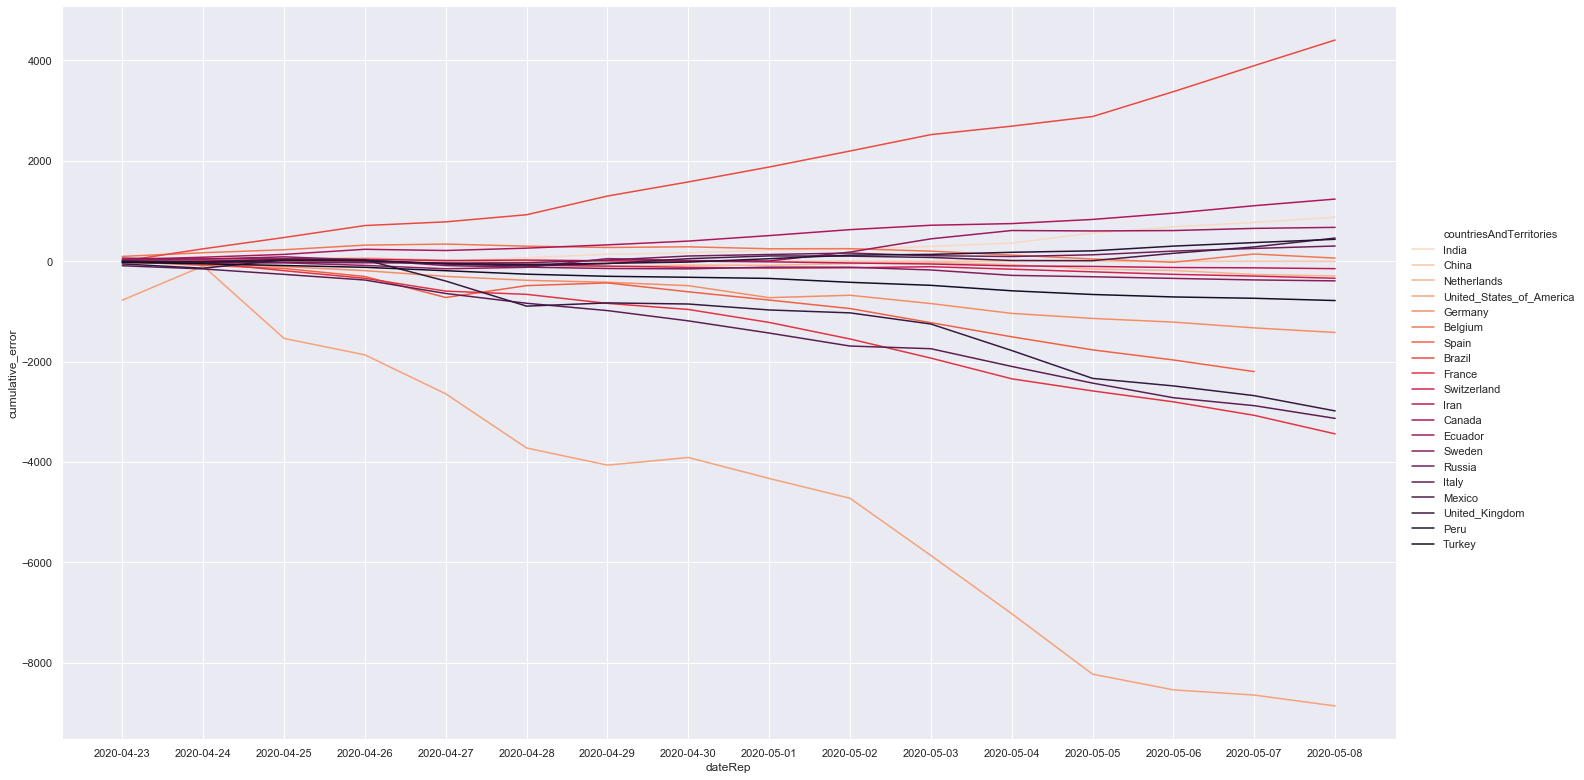

In [18]:
# Define a palette to ensure that colors will be
# shared across the facets
#sns.set_context(font_scale=101.5)
palette = dict(zip(df_global.countriesAndTerritories.unique(),
                   sns.color_palette("rocket_r", len(top_count))))
sns.set(rc={'figure.figsize':(12,9)}) #,font_scale=1.8)
# Plot the lines
g = sns.relplot(x="dateRep", y="cumulative_error",
            hue="countriesAndTerritories", palette=palette,
            height=11, aspect=1.8, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=df_global)
#plt.savefig('residual_deaths_20_countries_XGB_dpi300.jpeg', dpi=300)

In [19]:
if os.path.exists(os.path.join(data_folder, "model_predictions")) is False:
    os.mkdir(os.path.join(data_folder, "model_predictions"))
df_global.to_csv(os.path.join(data_folder, "model_predictions", "xgb_predictions.csv"))

Text(0.5, 0, 'Prediction error (m)')

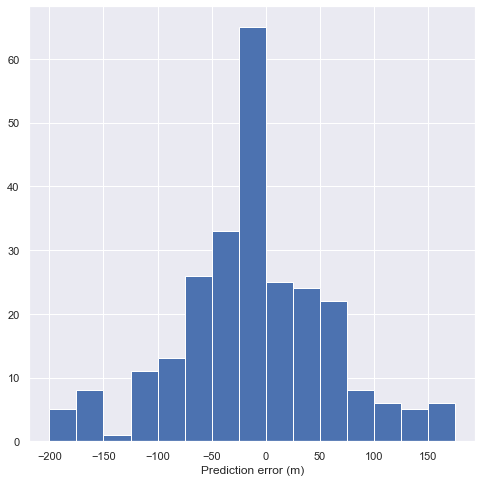

In [20]:
#plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.hist(df["model_error"], bins=np.arange(-200, 200,25))
plt.xlabel("Prediction error (m)")
#plt.show()

Text(0, 0.5, 'predicted Deaths')

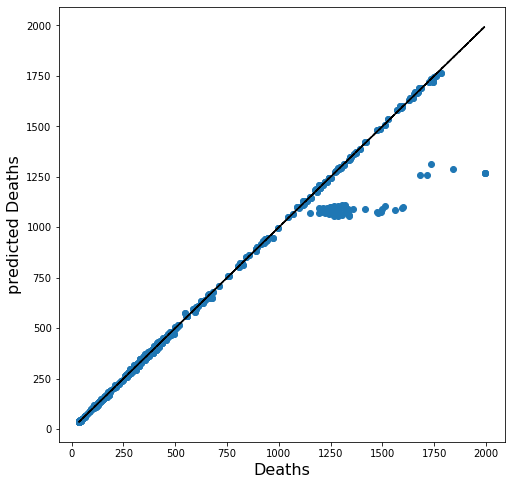

In [82]:
plt.figure(figsize=(8, 8))
plt.scatter(df_global[gold_col], df_global.gold_pred)
plt.plot(df_global[gold_col], df_global[gold_col], color="black", linestyle="--")
plt.xlabel("Deaths")
plt.ylabel("predicted Deaths")
#plt.show()

Text(0, 0.5, 'predicted Deaths')

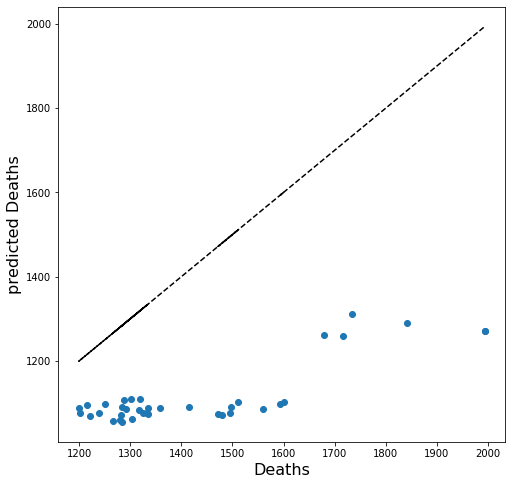

In [85]:
plt.figure(figsize=(8, 8))
plt.scatter(df.loc[df.index > '2017-08-31'][gold_col], df.loc[df.index > '2017-08-31']['gold_pred'])
plt.plot(df.loc[df.index > '2017-08-31'][gold_col], df.loc[df.index > '2017-08-31'][gold_col], color="black", linestyle="--")
plt.xlabel("Deaths")
plt.ylabel("predicted Deaths")
#plt.show()